In [1]:
import os
import random

import matplotlib.pyplot as plt

import numpy as np
import plotly.graph_objects as go  # or plotly.express as px
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

os.environ["GEOMSTATS_BACKEND"] = "pytorch"  # noqa: E402
import geomstats.backend as gs

import project_pregnancy.default_config as default_config
import src.datasets.utils as data_utils
import src.setcwd
from src.regression import training

src.setcwd.main()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
Working directory:  /home/nmiolane/code/my28brains/src
Directory added to path:  /home/nmiolane/code/my28brains
Directory added to path:  /home/nmiolane/code/my28brains/src
Directory added to path:  /home/nmiolane/code/my28brains/H2_SurfaceMatch
Directory added to path:  /home/nmiolane/code/my28brains/src/notebooks
Directory added to path:  /home/nmiolane/code/my28brains/src/notebooks/csv


In [2]:
# Multiple Linear Regression

(
    space,
    mesh_sequence_vertices,
    vertex_colors,
    hormones_df,
) = data_utils.load_real_data(default_config)

n_vertices = len(mesh_sequence_vertices[0])
n_meshes_in_sequence = len(mesh_sequence_vertices)
faces = gs.array(space.faces).numpy()

# TODO: instead, save these values in main_2, and then load them here. or, figure out how to predict the mesh using just the intercept and coef learned here, and then load them.

progesterone_levels = gs.array(hormones_df["prog"].values)
estrogen_levels = gs.array(hormones_df["estro"].values)
lh_levels = gs.array(hormones_df["lh"].values)
# gest_week = gs.array(all_hormone_levels["gestWeek"].values)

progesterone_average = gs.mean(progesterone_levels)
estrogen_average = gs.mean(estrogen_levels)
lh_average = gs.mean(lh_levels)
# gest_week_average = gs.mean(gest_week)

<module 'project_pregnancy.default_config' from '/home/nmiolane/code/my28brains/project_pregnancy/default_config.py'>
Using mesh data from (unsorted) reparameterized directory

Found 25 .plys for (left, -1) in /home/nmiolane/code/my28brains/project_pregnancy/results/1_preprocess/d_reparameterized
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
faces.shape: (2182, 3)
vertices.shape  (945, 3)
Day 15 has no data. Skipping.


tensor([5.3900e+01, 5.6800e+01, 7.0600e+01, 5.4700e+01, 6.4100e+01, 7.4200e+01,
        8.3000e+01, 9.5300e+01, 1.0300e+02, 1.2000e-01, 4.3000e-02, 6.8000e-02,
        4.2000e-02])
tensor(53.9000)


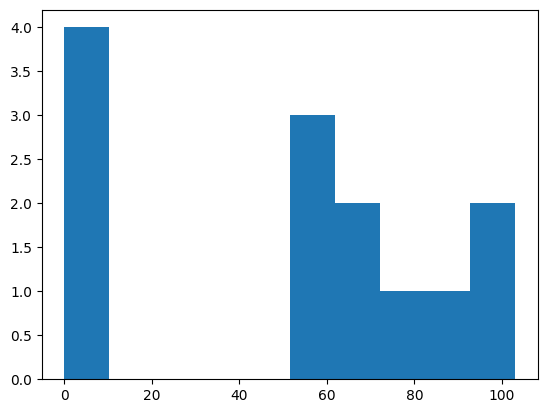

In [3]:
print(progesterone_levels)
print(min(progesterone_levels[:9]))
plt.hist(progesterone_levels);

tensor([4.7000e+03, 4.1000e+03, 6.1900e+03, 9.6400e+03, 8.8000e+03, 1.0200e+04,
        9.9200e+03, 9.8600e+03, 1.2400e+04, 9.1800e+00, 2.0700e+01, 1.7500e+01,
        1.1500e+01])
tensor(4100.)


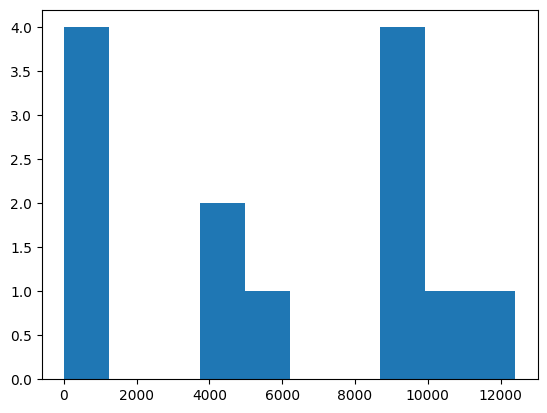

In [4]:
print(estrogen_levels)
print(min(estrogen_levels[:9]))
plt.hist(estrogen_levels);

tensor([1.4500, 0.8700, 0.9300, 0.6200, 0.7300, 0.6900, 0.7700, 0.8300, 0.5900,
        0.9600, 4.0100, 7.5800, 4.6700])


(array([9., 1., 0., 0., 1., 1., 0., 0., 0., 1.]),
 array([0.59 , 1.289, 1.988, 2.687, 3.386, 4.085, 4.784, 5.483, 6.182,
        6.881, 7.58 ]),
 <BarContainer object of 10 artists>)

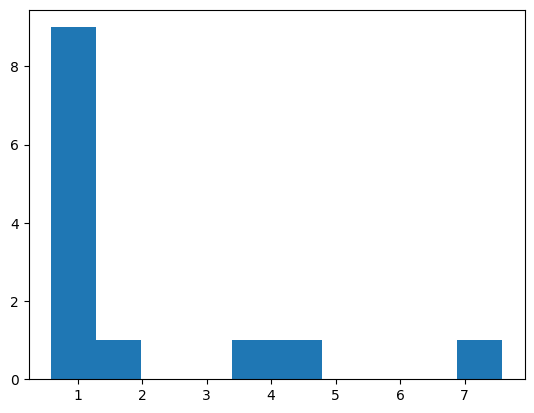

In [5]:
print(lh_levels)

plt.hist(lh_levels)

In [18]:
y = mesh_sequence_vertices

n_components = 1
pca = PCA(n_components=n_components)

y_reshaped = y.reshape(n_meshes_in_sequence, -1)
mean_mesh = y_reshaped.mean(axis=0)
y_reshaped = y_reshaped - mean_mesh

y_pca = pca.fit_transform(y_reshaped)
explained_var = np.sum(pca.explained_variance_ratio_)
print(f"The cumulated variance explained with {n_components} components is: {explained_var}")

The cumulated variance explained with 1 components is: 0.24295286628371285


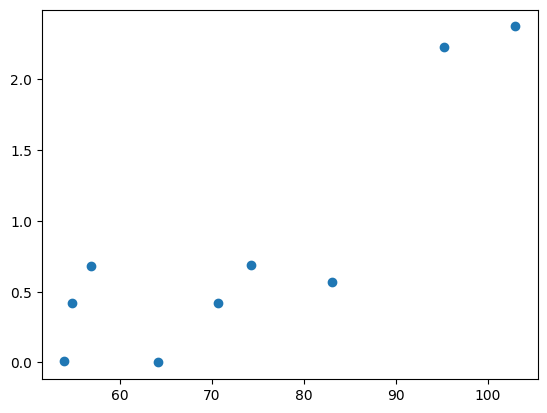

In [36]:
# print(np.sqrt(y_pca[:9]))
# print(y_pca[:9])

X = progesterone_levels.reshape(-1, 1)
#X = estrogen_levels[:9].reshape(-1, 1)
plt.scatter(X[:9], np.log(1+y_pca[:9] - min(y_pca[:9])))
#plt.scatter(X[:9], y_pca[:9])
#plt.scatter(X, np.log(1+y_pca))

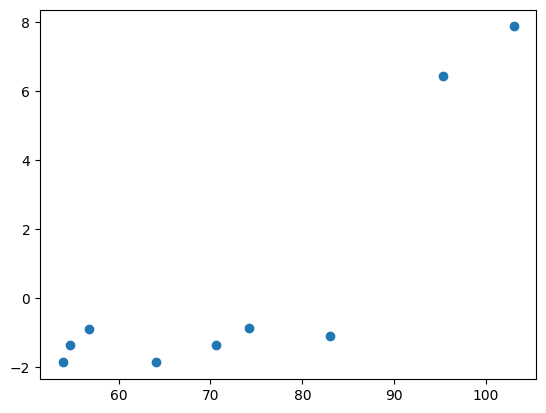

In [8]:
plt.scatter(X[:9], y_pca[:9])

In [9]:
X_multiple = gs.vstack(
    (
        progesterone_levels,
        estrogen_levels,
        lh_levels,
    )
).T

#print(X_multiple[0])  #tensor([5.3900e+01, 4.7000e+03, 1.4500e+00])
lr = LinearRegression()


lr.fit(X_multiple[:9], y_pca[:9])

test_id = 0
print(f"y_pca = {y_pca[test_id]}")
pred = lr.predict(X_multiple[test_id].reshape(1, -1))
print(f"pred = {pred}")

y_pca = [-1.86692533]
pred = [[-2.6535675]]


In [10]:
#hormones = [41, 5803, 2]

test_hormones = X_multiple[0].reshape(1, -1)  #gs.array([hormones])
y_pca_pred = lr.predict(test_hormones)

y_pred = pca.inverse_transform(y_pca_pred) + mean_mesh.numpy()
y_pred = y_pred.reshape(n_vertices, 3)

In [11]:
import src.viz as viz

y.shape

torch.Size([13, 945, 3])

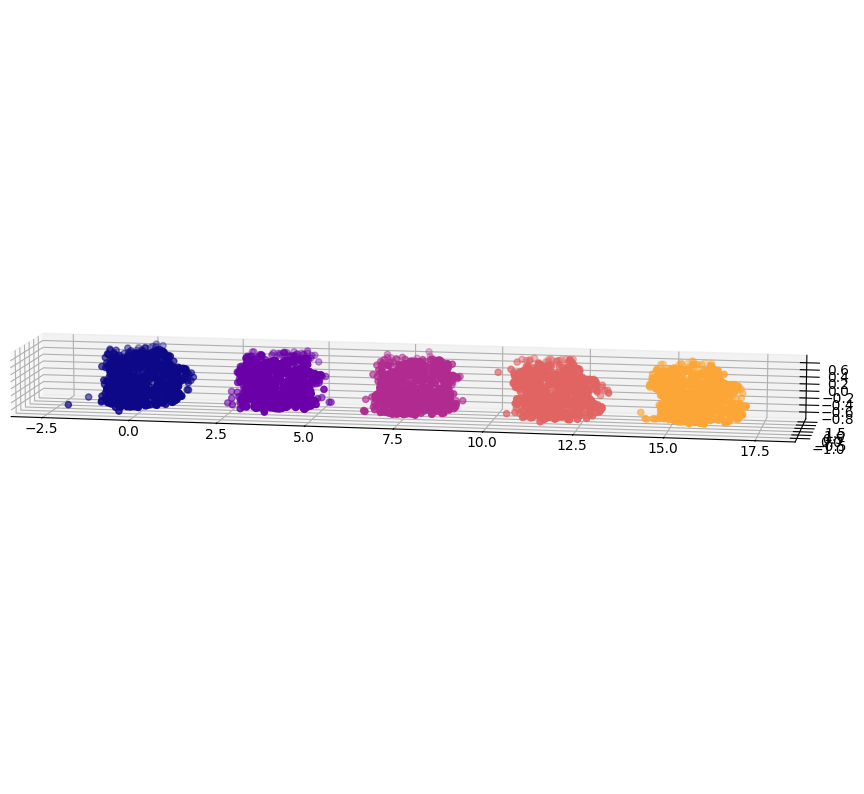

In [12]:
mesh_sequence_vertices_offset = viz.offset_mesh_sequence(mesh_sequence_vertices)

viz.plot_mesh_sequence(mesh_sequence_vertices_offset[:5])

(13, 945, 3)


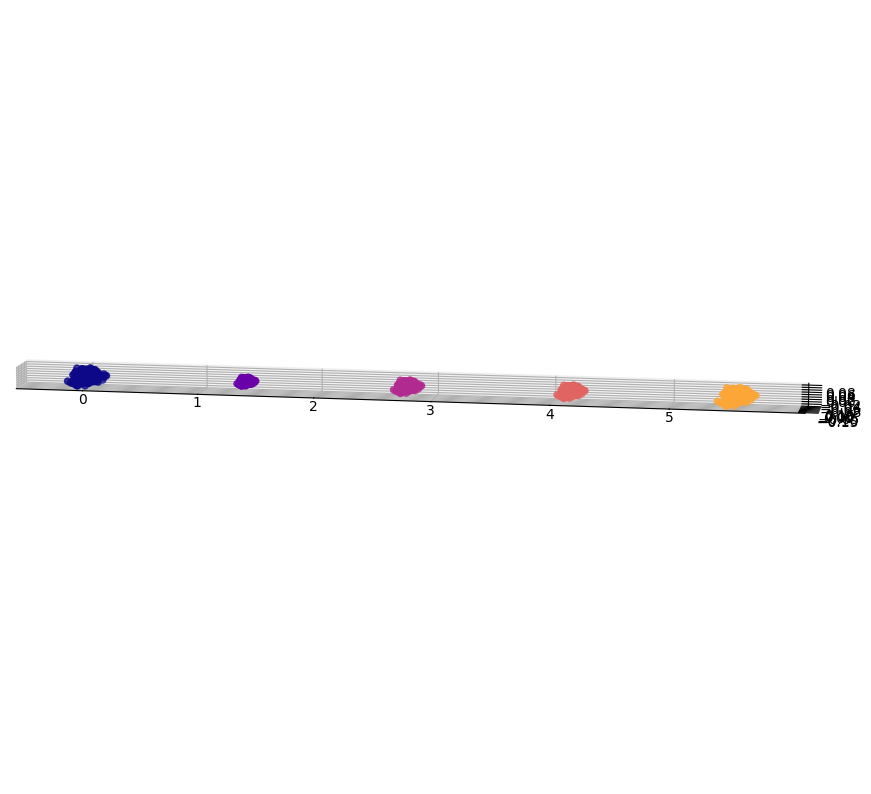

In [13]:
y_pred = pca.inverse_transform(y_pca).reshape((13, -1, 3))
print(y_pred.shape)
mesh_sequence_vertices_offset = viz.offset_mesh_sequence(y_pred)

viz.plot_mesh_sequence(mesh_sequence_vertices_offset[:5])

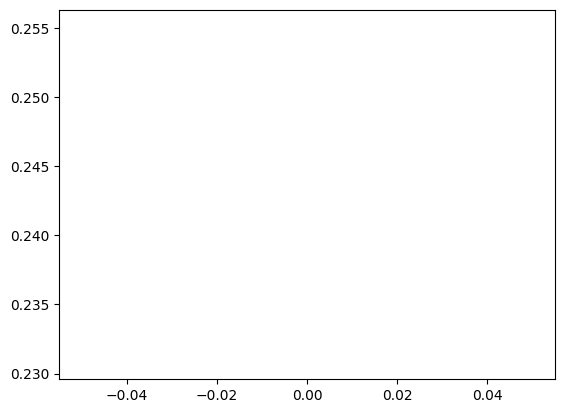

In [14]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [15]:
# pca variance plot:

In [16]:
X_multiple = gs.vstack(
    (
        progesterone_levels,
        estrogen_levels,
        lh_levels,
        # gest_week,
    )
).T  # NOTE: copilot thinks this should be transposed.
lr = LinearRegression()

In [17]:
p_values = [0., 0., 0.]  # placeholder, else: training.calculate_p_values(X_multiple, y_pca, lr)
intercept_hat = lr.intercept_
coef_hat = lr.coef_

lr.fit(X_multiple, y_pca)
p_values = [0., 0., 0.]  # placeholder, else: training.calculate_p_values(X_multiple, y_pca, lr)
intercept_hat = lr.intercept_
coef_hat = lr.coef_

# NOTE (Nina): this is not really n_train
# since we've just trained on the whole dataset
n_train = int(default_config.train_test_split * n_meshes_in_sequence)

X_indices = np.arange(n_meshes_in_sequence)
# Shuffle the array to get random values
random.shuffle(X_indices)
train_indices = X_indices[:n_train]
train_indices = np.sort(train_indices)
test_indices = X_indices[n_train:]
test_indices = np.sort(test_indices)
mr_score_array = training.compute_R2(y_pca, X_multiple, test_indices, train_indices)

progesterone_p_value = p_values[0]
estrogen_p_value = p_values[1]
lh_p_value = p_values[2]

AttributeError: 'LinearRegression' object has no attribute 'intercept_'